In [19]:
from sklearn import datasets
from sklearn.decomposition import PCA, NMF
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Manifold Learning

* Class of algorithms for visualization
* Allow much more complex mappings
* Provide better visualization
* Rarely used for generating more than 2 features
* Compute new representation of training data
* Cannot be applied to test set
* Useful for EDA

## t-SNE “t-distributed Stochastic Neighbor Embedding”

* finding a 2D representation of the data that preserves the distances between points as best as possible.
* starts with random 2D representation for each data point
* tries to keep close points closer and points apart in original feature space farther apart 
* puts more emphasis on points that are close by
* it tries to preserve the information indicating which points are neighbors to each other

#### t-SNE on handwritten digits

* each point in dataset is 8x8 grayscale image of handwritten digit from 0-9

In [5]:
digits = datasets.load_digits()
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

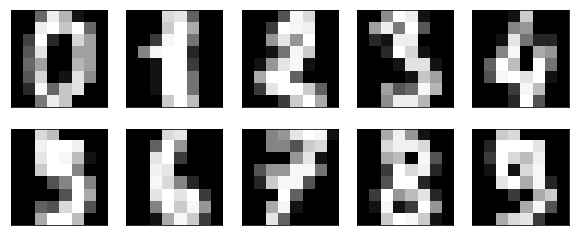

In [14]:
# potting the digit images
fig, ax = plt.subplots(2, 5, figsize=(10,4), 
                       subplot_kw={'xticks':(), 'yticks':()})

for img, ax in zip(digits.images, ax.ravel()):
    ax.imshow(img, cmap='Greys_r')
plt.show()

Lets apply PCA to reduce features to 2D and visualize the result.

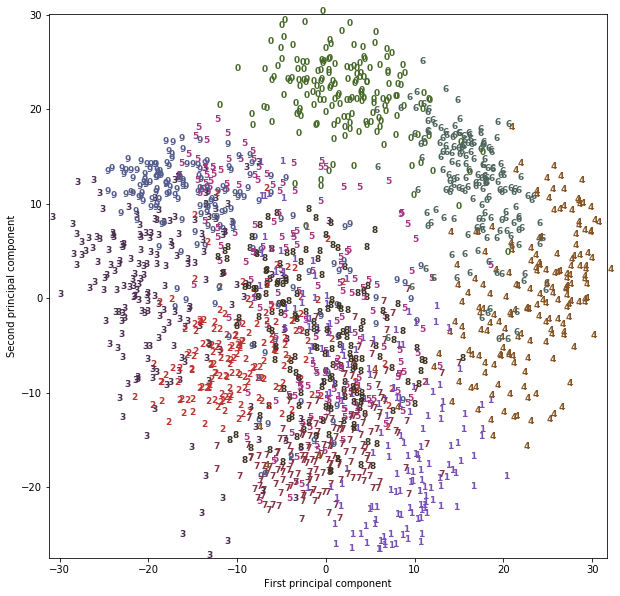

In [16]:
# build a PCA model
pca = PCA(n_components=2)
pca.fit(digits.data)
# transform the digits data onto the first two principal components
digits_pca = pca.transform(digits.data)
colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525",
          "#A83683", "#4E655E", "#853541", "#3A3120", "#535D8E"]
plt.figure(figsize=(10, 10))
plt.xlim(digits_pca[:, 0].min(), digits_pca[:, 0].max())
plt.ylim(digits_pca[:, 1].min(), digits_pca[:, 1].max())
for i in range(len(digits.data)):
# actually plot the digits as text instead of using scatter
    plt.text(digits_pca[i, 0], digits_pca[i, 1], str(digits.target[i]),
             color = colors[digits.target[i]], fontdict={'weight': 'bold', 'size': 9})
    plt.xlabel("First principal component")
    plt.ylabel("Second principal component")
plt.show()

Let's use t-SNE instead

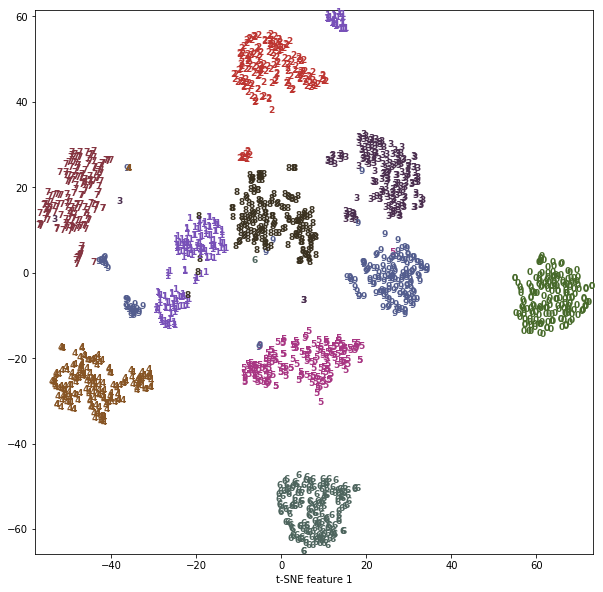

In [18]:
tsne = TSNE(random_state=42)
# use fit_transform instead of fit, as TSNE has no transform method
digits_tsne = tsne.fit_transform(digits.data)
plt.figure(figsize=(10, 10))
plt.xlim(digits_tsne[:, 0].min(), digits_tsne[:, 0].max() + 1)
plt.ylim(digits_tsne[:, 1].min(), digits_tsne[:, 1].max() + 1)
for i in range(len(digits.data)):
# actually plot the digits as text instead of using scatter
    plt.text(digits_tsne[i, 0], digits_tsne[i, 1], str(digits.target[i]),
             color = colors[digits.target[i]], fontdict={'weight': 'bold', 'size': 9})
    plt.xlabel("t-SNE feature 0")
    plt.xlabel("t-SNE feature 1")
plt.show()

* result is much better than PCA
* classes are clearly separated

## t-SNE, NMF and PCA on iris

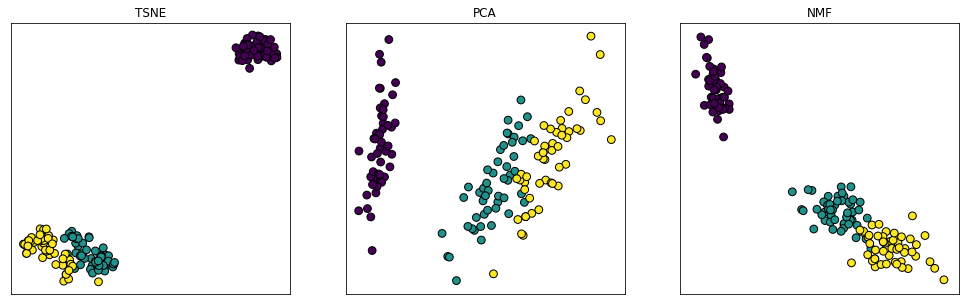

In [22]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

fig, axes = plt.subplots(1, 3, figsize=(17, 5),
                      subplot_kw={'xticks':(), 'yticks':()})

algorithms = [TSNE(), PCA(n_components=2), NMF(n_components=2)]

for ax, algorithm in zip(axes.ravel(), algorithms):
    X_pred = algorithm.fit_transform(X)
    ax.scatter(X_pred[:,0], X_pred[:,1], c=y, cmap='viridis', s=60, edgecolor='black')
    ax.set_title('{}'.format(algorithm.__class__.__name__))
plt.show()